In [7]:
def find_not_blood_sample(samplenames):
  li = []
  for i, name in enumerate(samplenames):
    if "Blood" not in name:
        li.append (i)
  return li


import pandas as pd
import vcf

PROJECT_DIR = "/data/project/Meningioma"
vcf_reader = vcf.Reader(open( PROJECT_DIR + "/04.mutect/07.2D_merged/02.BCFTOOLS_MERGE_VCF/190426.BCFTOOLS_MERGE.vcf", "r"))
title = "190426"
Output_filename = PROJECT_DIR + "/04.mutect/07.2D_merged/02.BCFTOOLS_MERGE_VCF/190426.merged.heatmap.pdf"


samplenames = vcf_reader.samples
not_blood_sample_i = find_not_blood_sample ( samplenames )

d_binary = pd.DataFrame ( columns = [ samplenames[i] for i in not_blood_sample_i ] )            # Blood가 아닌 샘플들에 대해서만 집어넣겠다
d_vaf = pd.DataFrame ( columns = [ samplenames[i] for i in not_blood_sample_i ] )            # Blood가 아닌 샘플들에 대해서만 집어넣겠다
df_depth = pd.DataFrame ( columns = [ samplenames[i] for i in not_blood_sample_i ] )
df_alt = pd.DataFrame ( columns = [ samplenames[i] for i in not_blood_sample_i ] )
chrpos, chrpos_Sequoia = [], []

for line in vcf_reader:
    CHR = line.CHROM
    POS = str (line.POS)
    REF, ALT = str(line.REF), str( line.ALT[0] )

    matrix, matrix_vaf, matrix_alt, matrix_depth = [], [], [], []
    for sample_i, samplename in enumerate (samplenames):
        if line.samples [sample_i].data.GT in ["./.", ".", "0/0", "0|0"]:
            matrix.append ( 0 )
            matrix_vaf.append ( 0  )
            matrix_alt.append(  0  )
            matrix_depth.append(  100  )
        else:
            matrix.append ( 1  )
            matrix_vaf.append ( round( line.samples [sample_i].data.AD[1] / line.samples [sample_i].data.DP, 2 )  )
            matrix_alt.append(  round ( line.samples [sample_i].data.DP / 2)  )
            matrix_depth.append(  line.samples [sample_i].data.DP  )

    d_binary.loc [ len(d_binary.index) ] =  [ matrix[i] for i in not_blood_sample_i ]      # 한줄씩 집어넣기
    d_vaf.loc [ len(d_vaf.index) ] =  [ matrix_vaf[i] for i in not_blood_sample_i ]      # 한줄씩 집어넣기
    df_alt.loc [ len(df_alt.index) ] =  [ matrix_alt [i] for i in not_blood_sample_i ]      # 한줄씩 집어넣기
    df_depth.loc [ len(df_depth.index) ] =  [ matrix_depth[i] for i in not_blood_sample_i ]      # 한줄씩 집어넣기
    chrpos.append ( CHR + "_" + POS )
    chrpos_Sequoia.append ( CHR.replace("chr", "") + "_" + POS + "_" + REF + "_" + ALT)
d_binary.index =  chrpos
d_vaf.index =  chrpos
df_depth.index = chrpos_Sequoia
df_alt.index = chrpos_Sequoia

df_depth["ancestry"] = 100
df_alt["ancestry"] = 0

df_alt.iloc[:, :].to_csv ( Output_filename.replace(".pdf", ".alt.tsv"), sep = "\t")
df_depth.iloc[:, :].to_csv ( Output_filename.replace(".pdf", ".depth.tsv"), sep = "\t")


d_binary = d_binary.sort_values(by=d_binary.columns.tolist(), ascending=False)
d_binary = d_binary.T
d_binary

d_vaf = d_vaf.sort_values(by=d_vaf.columns.tolist(), ascending=False)
d_vaf = d_vaf.T
d_vaf

#3. scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d_scale = d_vaf
scaler.fit(d_scale)
d_scale = scaler.transform( d_scale )  # Transform the data

In [6]:
pd.set_option('display.max_rows', 500)
d_binary.T

,190426_Tumor_FFT,190426_Tumor_PCT,190426_Tumor_PFT,190426_Tumor_PT,190426_Tumor_PP,190426_Dura
chr22_29636758,1,1,1,1,1,1
chr2_178544366,1,0,0,0,0,0
chr2_190979854,1,0,0,0,0,0
chr8_72052629,1,0,0,0,0,0
chr12_82896403,1,0,0,0,0,0
chr2_26774230,0,1,0,0,0,0
chr2_28298497,0,1,0,0,0,0
chr8_99507844,0,1,0,0,0,0
chr1_151048132,0,1,0,0,0,0
chr9_76023833,0,1,0,0,0,0


<ipython-input-24-0da532044daf>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels ( ax.get_yticklabels() , fontsize = 10, fontweight = "bold"  )
<ipython-input-24-0da532044daf>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels ( ax.get_yticklabels() , fontsize = 10, fontweight = "bold"  )
<ipython-input-24-0da532044daf>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels ( ax.get_yticklabels() , fontsize = 10, fontweight = "bold"  )


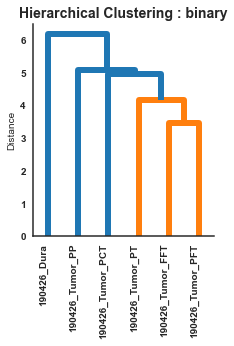

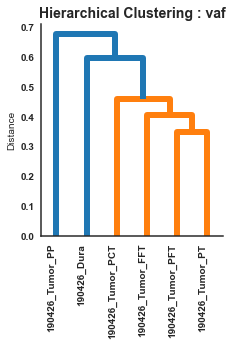

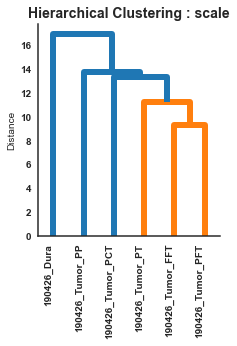

In [24]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the dendrogram
def HierichialClustering (df, colnames, title, OUTPUT_FILEPATH ):
    fig, ax = plt.subplots(1, 1, figsize = (8 / 2.54, 15 / 2.54))
    fig.subplots_adjust (wspace = 0.2, hspace = 0.8, bottom = 0.35, top = 0.85, left = 0.15, right = 0.95)
    sns.set_style("white")
    plt.rcParams['lines.linewidth'] = 6
    plt.rcParams["font.family"] = 'arial'

    def my_label_func ( leaf_label ):  # 0, 1, 2, 3
        return colnames [leaf_label ]

    D = scipy.cluster.hierarchy.dendrogram(
        scipy.cluster.hierarchy.linkage( df, method = 'ward', metric = 'euclidean'),
        leaf_label_func = my_label_func,  # column 이름 정하기
        leaf_rotation = 90  # Rotate labels for better readability
    )

    ax.tick_params(axis = 'x', rotation = 90 )
    ax.set_xticklabels ( ax.get_xticklabels() , fontsize = 10, fontweight = "bold", ha = "right"  ) 
    ax.set_yticklabels ( ax.get_yticklabels() , fontsize = 10, fontweight = "bold"  ) 
    ax.set_title('Hierarchical Clustering : {}'.format (title), fontweight = "semibold", fontsize = 14)
    ax.set_ylabel('Distance')

    for axis in ['left','bottom', 'right', 'top']:
        ax.spines[axis].set_linewidth (1.5)
    sns.despine ( top = True, right = True, ax = ax)
    plt.savefig (OUTPUT_FILEPATH)

################################################################################################################


HierichialClustering ( d_binary ,  list ( d_binary.index ), "binary",  "/data/project/Meningioma/script/03.Variant_calling&Annotation/190426.dendrogram.binary.pdf" )       # Binary 를 넣었을 때
HierichialClustering ( d_vaf,  list ( d_binary.index ),  "vaf", "/data/project/Meningioma/script/03.Variant_calling&Annotation/190426.dendrogram.vaf.pdf" )                       # Scaling 한 AF 를 넣었을 때
HierichialClustering ( d_scale, list ( d_binary.index ),  "scale",  "/data/project/Meningioma/script/03.Variant_calling&Annotation/190426.dendrogram.scale.pdf" )        # Scaling 안한 AF를 넣었을 떄